# importing the dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_auc_score , precision_score, recall_score, f1_score
import pickle

# Data loading and understanding

In [4]:
# load csv data to a pandas dataframe
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
pd.set_option("display.width", None)   # no line wrap
pd.set_option("display.max_columns", None)  # show all columns

In [6]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# shape of data set
df.shape

(7043, 21)

In [8]:
# info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Dropping custmer id columns as this is not required for modelling
df= df.drop(columns=["customerID"])

In [10]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [11]:
# printing unique values in all the  categorical columns

numerical_feature_list = ['tenure' , 'MonthlyCharges' ,	'TotalCharges']
for col in df.columns:
    if col not in numerical_feature_list:
        print(col , df[col].unique())
        print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [12]:
#df['TotalCharges']=df['TotalCharges'].astype(float)

In [13]:
len(df[df['TotalCharges']==" "])

11

In [14]:
df['TotalCharges']=df['TotalCharges'].replace({" ": "0.0"})

In [15]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
# Checking class Distribution of target column
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


# EDA

In [19]:
df.shape

(7043, 20)

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#Numerical Features - Analysis

Undestand the distributions of numerical feature

In [25]:
def plot_histogram(df , column_name):
    
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name] , kde=True)# kernel density estimation
    plt.title(f"Distribution of {column_name} ")
    
    # Calculate the mean and median values for the columns
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # add vertical line for mean and medain
    plt.axvline(col_mean , color="red" , linestyle="--" , label="Mean")
    plt.axvline(col_median , color="green" , linestyle="--" , label="Medain")

    plt.legend()
    plt.show()

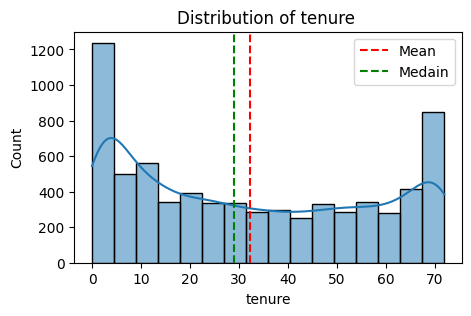

In [26]:
plot_histogram(df , "tenure")

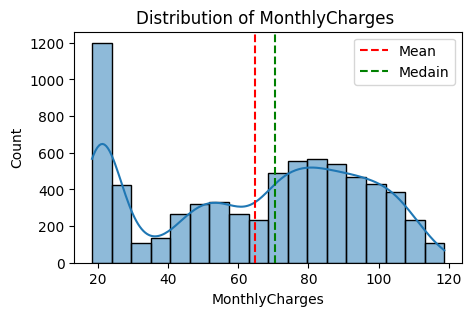

In [27]:
plot_histogram(df , "MonthlyCharges")

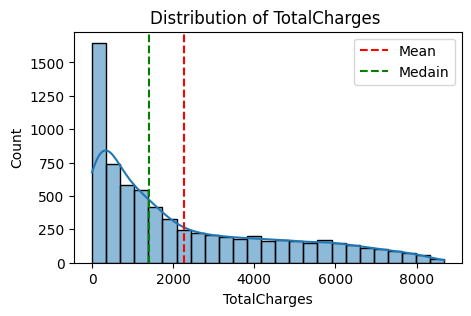

In [28]:
plot_histogram(df , "TotalCharges")

Box plot for numerical features

In [30]:
def plot_boxplot(df , column_name):
    
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])# kernel density estimation
    plt.title(f"Distribution of {column_name} ")
    plt.ylabel(column_name)
    plt.show()

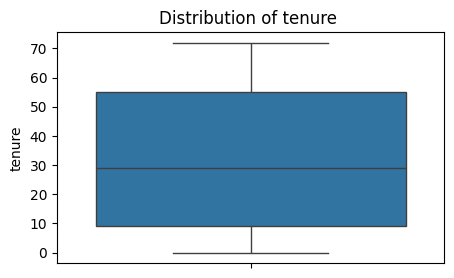

In [31]:
plot_boxplot(df , "tenure")

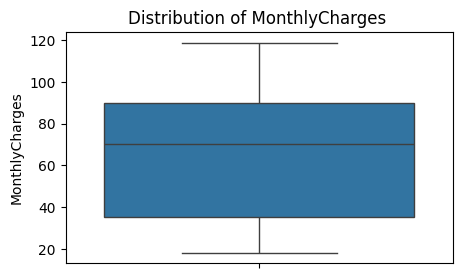

In [32]:
plot_boxplot(df , "MonthlyCharges")

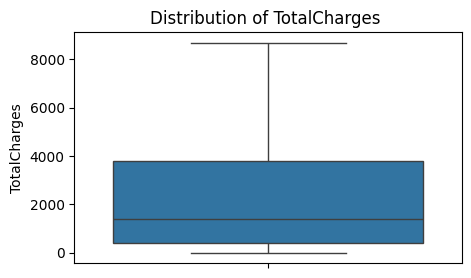

In [33]:
plot_boxplot(df , "TotalCharges")

Correlation heatmap between numerical features

In [35]:
corr = df[["tenure" , "MonthlyCharges" , "TotalCharges"]].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


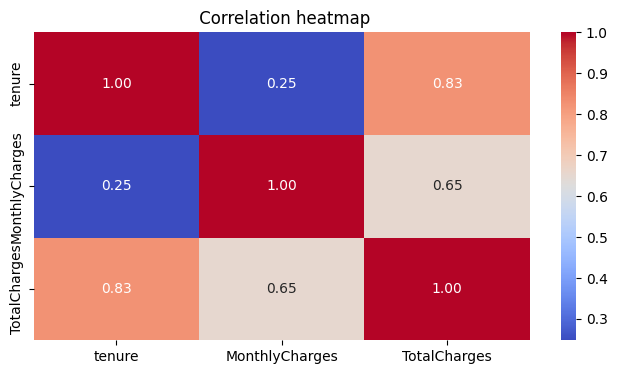

In [36]:
# Correlation matrix  - heatmap

plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure' ,"MonthlyCharges" , "TotalCharges"]].corr() , annot=True , cmap="coolwarm" , fmt=".2f")
plt.title(" Correlation heatmap")
plt.show()

Categorical features analysis

In [38]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Count plot for categorical columns

In [40]:
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols = ["SeniorCitizen"] + object_cols
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

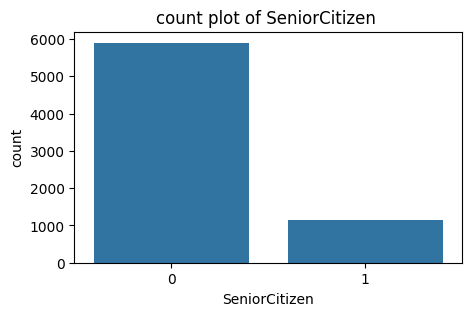

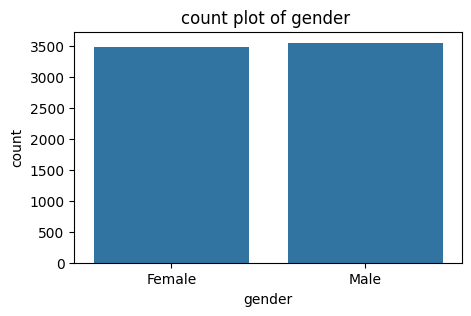

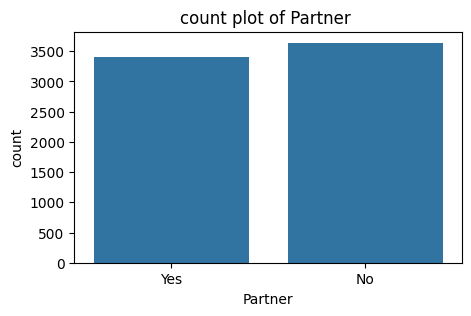

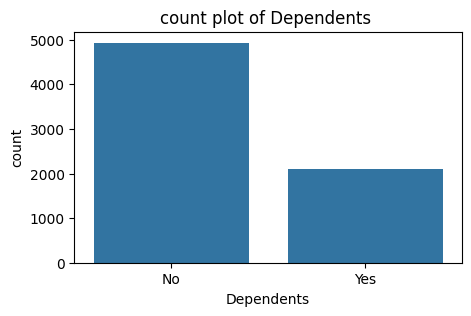

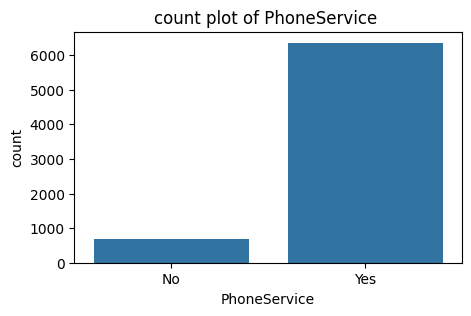

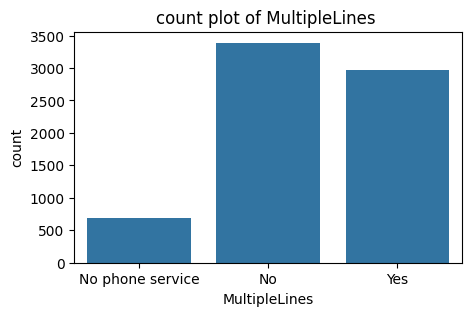

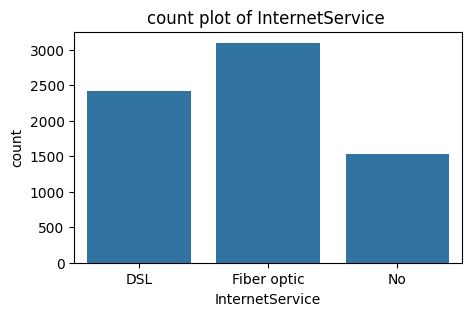

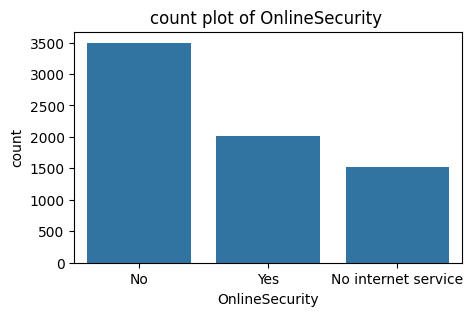

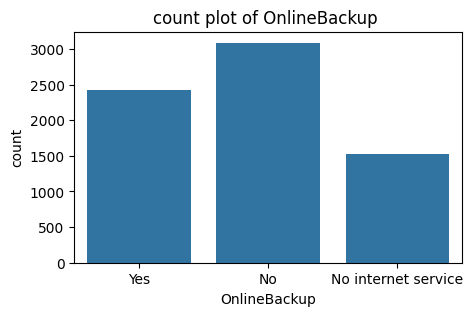

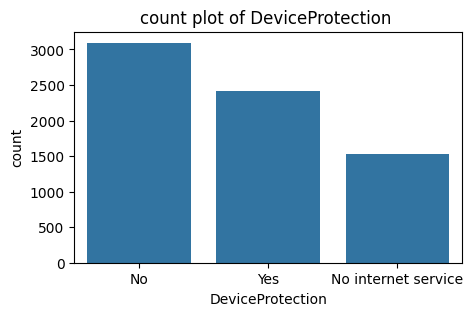

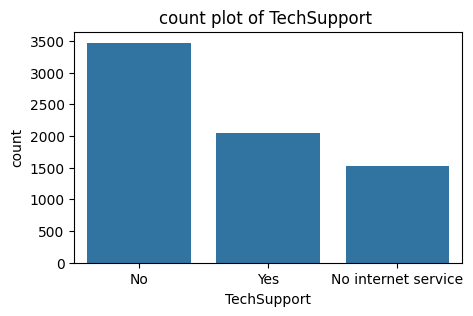

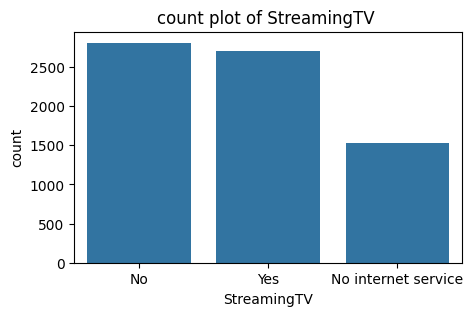

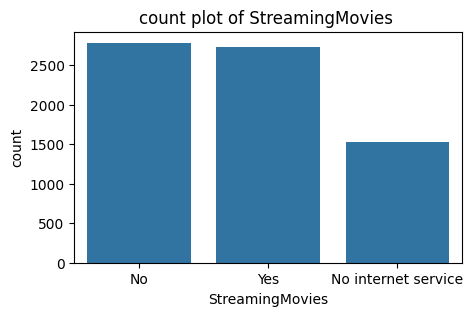

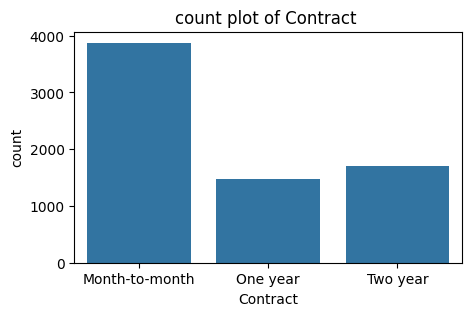

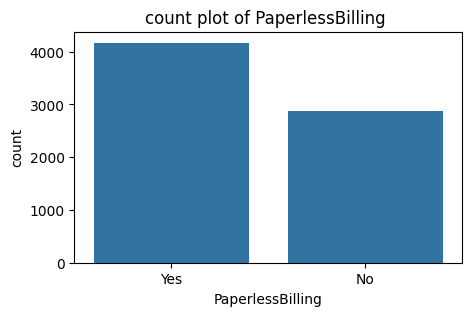

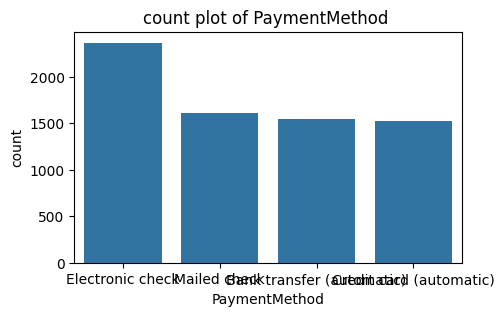

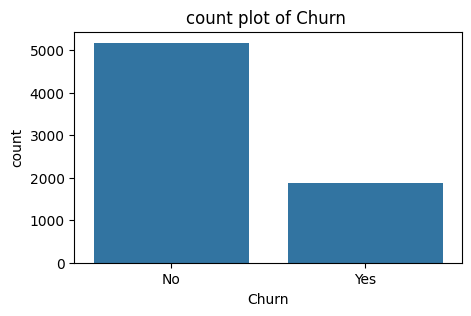

In [41]:
for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"count plot of {col} ")
    plt.show()

# Data Preprocessing

In [43]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Label Encoding of target column

In [45]:
df["Churn"] = df["Churn"].replace({"Yes":1 , "No":0})

In [46]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [47]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [48]:
# identifying the columns with object data types
object_columns = df.select_dtypes(include="object").columns

In [49]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [50]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

# save the encoders to pickle file 
# with open("encoders pkl" , "wb") as f:
#     pickle.dump(encoders , f)     

In [51]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [52]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Training and test data split

In [54]:
# splitting feature and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [55]:
print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [56]:
# split training and test data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [57]:
print(y_train.shape)

(5634,)


In [58]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [59]:
# Performing synthetic minority oversampling TEchnique(SMOTE)
smote = SMOTE(random_state=42)

In [60]:
X_train_smote , y_train_smote = smote.fit_resample(X_train , y_train)

In [61]:
print(y_train_smote.shape)

(8276,)


In [62]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


# Model Training and Evaluation

In [64]:
# Logistic regression
log_reg = LogisticRegression(max_iter=300, random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=300, random_state=42)

In [65]:
y_pred = log_reg.predict(X_test)
print("Iterations used:", log_reg.n_iter_)

Iterations used: [300]


In [66]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

# precision, recall, f1-score
print(classification_report(y_test, y_pred))

# roc auc score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

[[786 250]
 [ 77 296]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1036
           1       0.54      0.79      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.81      0.77      0.78      1409

ROC AUC Score: 0.7761264711666858


In [67]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7679205110007097
Precision: 0.5421245421245421
Recall: 0.7935656836461126
F1 Score: 0.6441784548422198


In [68]:
rf = RandomForestClassifier(random_state=42)

# define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],      # number of trees
    'max_depth': [None, 5, 10, 20],            # depth of each tree
    'min_samples_split': [2, 5, 10],           # min samples to split node
    'min_samples_leaf': [1, 2, 4]              # min samples in leaf node
}

In [69]:
# grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,              # 3-fold cross validation
    scoring='f1',      # optimize for F1 score (better for churn)
    n_jobs=-1,         # use all CPU cores
    verbose=2
)

grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='f1', verbose=2)

In [70]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# best model
best_rf = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1 Score: 0.8072185691344297


In [71]:
# predict on test data
y_pred_best = best_rf.predict(X_test)

# evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_best))

Confusion Matrix:
 [[834 202]
 [114 259]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1036
           1       0.56      0.69      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409

Accuracy: 0.7757274662881476
Precision: 0.561822125813449
Recall: 0.6943699731903485
F1 Score: 0.6211031175059952
ROC AUC Score: 0.7496946391048268


In [72]:
# define model
xgb = XGBClassifier(
    n_estimators=300,       # number of trees
    max_depth=5,           # depth of trees
    learning_rate=0.1,     # step size
    subsample=0.8,         # use 80% of data per tree
    colsample_bytree=0.8,  # use 80% of features per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [73]:
# train
xgb.fit(X_train_smote, y_train_smote)

# predict
y_pred_xgb = xgb.predict(X_test)

In [74]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))

Confusion Matrix:
 [[887 149]
 [140 233]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1036
           1       0.61      0.62      0.62       373

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.80      1409

Accuracy: 0.794889992902768
Precision: 0.6099476439790575
Recall: 0.6246648793565683
F1 Score: 0.6172185430463576
ROC AUC Score: 0.7404212427670872


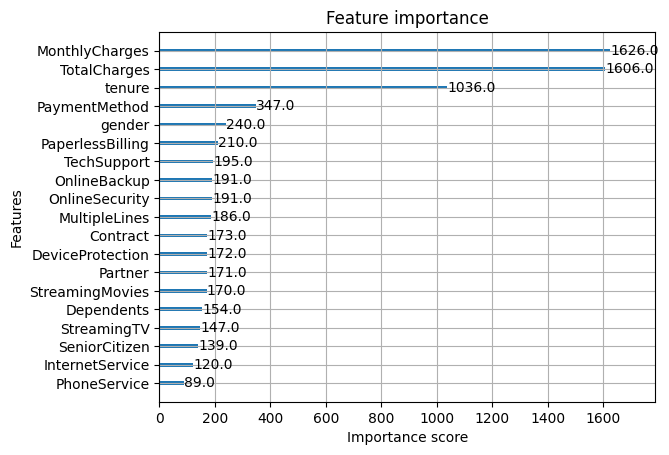

In [75]:
from xgboost import plot_importance

plot_importance(xgb)
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [77]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}

In [78]:
# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=300,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [1, 5, 10],
                         'subsample': [0.7, 1]},
             scoring='f1', verbose=2)

In [79]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best F1 Score
print("Best F1 Score:", grid_search.best_score_)

# Evaluate on test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
print("Test F1 Score:", f1_score(y_test, y_pred))

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.7}
Best F1 Score: 0.5901037682861204
Test F1 Score: 0.5991058122205664


In [80]:
# Create a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

In [81]:
# Evaluate all 3 models
log_results = evaluate_model(log_reg, X_test, y_test)
rf_results = evaluate_model(best_rf, X_test, y_test)
xgb_results = evaluate_model(best_xgb, X_test, y_test)

# Combine results into a DataFrame for comparison
results = pd.DataFrame([log_results, rf_results, xgb_results],
                       index=["Logistic Regression", "Random Forest", "XGBoost"])

print(results)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.740951   0.508349  0.732620  0.600219
Random Forest        0.841732   0.664488  0.815508  0.732293
XGBoost              0.809084   0.676768  0.537433  0.599106


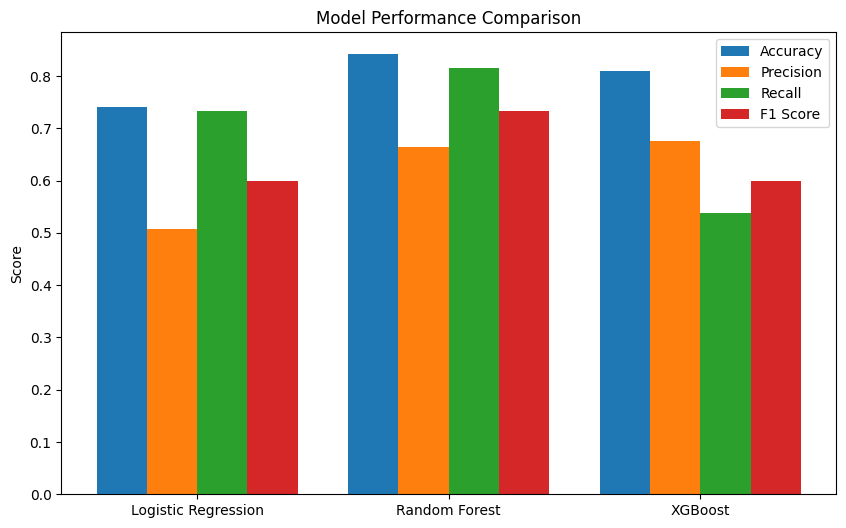

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
models = ["Logistic Regression", "Random Forest", "XGBoost"]
accuracy = [0.740951, 0.841732, 0.809084]
precision = [0.508349, 0.664488, 0.676768]
recall = [0.732620, 0.815508, 0.537433]
f1 = [0.600219, 0.732293, 0.599106]

# X locations
x = np.arange(len(models))
width = 0.2  

plt.figure(figsize=(10,6))

plt.bar(x - 0.3, accuracy, width, label="Accuracy")
plt.bar(x - 0.1, precision, width, label="Precision")
plt.bar(x + 0.1, recall, width, label="Recall")
plt.bar(x + 0.3, f1, width, label="F1 Score")

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()


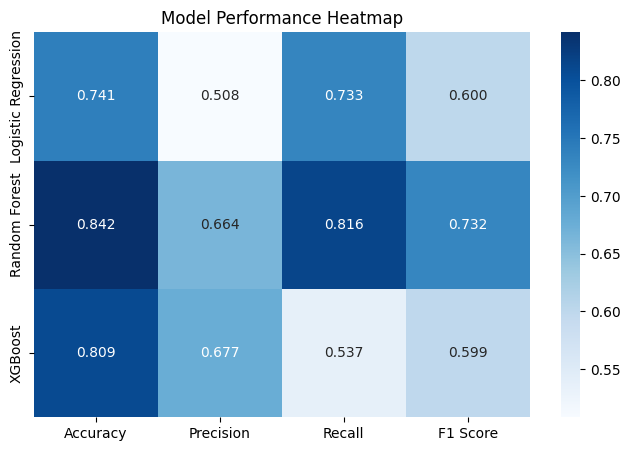

In [83]:
import seaborn as sns
import pandas as pd

data = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

df = pd.DataFrame(data, index=models)

plt.figure(figsize=(8,5))
sns.heatmap(df, annot=True, cmap="Blues", fmt=".3f")
plt.title("Model Performance Heatmap")
plt.show()

In [84]:
# import os


# # Make sure folder exists
# os.makedirs("models", exist_ok=True)

# # Save model
# with open("models/final_model.pkl", "wb") as f:
#     pickle.dump(rf, f)   # rf is your trained model